#**Smarthphone Sales Dataset**

Nama : Farrel Fazzadinata Sumarna

Kelas : C

NIM : 2509116111

#**Import Library**

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#**Business Understanding**

Dalam industri teknologi yang sangat kompetitif, produsen dan peritel smartphone perlu memahami dinamika harga dan spesifikasi untuk tetap relevan. Masalah utama yang sering dihadapi adalah menentukan harga jual yang kompetitif namun tetap menguntungkan, serta memahami fitur apa yang sebenarnya menjadi standar di tiap segmen pasar (Low, Mid, High-end). Analisis ini bertujuan untuk mengekstrak pola dari data historis penjualan untuk mendukung pengambilan keputusan strategis.

##**Business Objective**

Tujuan utama dari proyek ini adalah:

1. Optimalisasi Penetapan Harga: Menentukan rentang harga yang ideal untuk model smartphone baru berdasarkan spesifikasi teknisnya.

2. Analisis Dominasi Pasar: Mengidentifikasi merek (Brand) yang memiliki varian produk terbanyak dan bagaimana pengaruhnya terhadap rata-rata harga pasar.

3. Strategi Pemasaran Berbasis Fitur: Mengetahui spesifikasi kunci (seperti RAM, Storage, atau Kapasitas Baterai) yang paling signifikan mendongkrak nilai jual produk.

##**Assess Situation**

1. Sumber Data: Dataset eksternal dari Kaggle yang berisi kolom seperti Nama Model, Brand, Harga, RAM, Storage, Rating, dan spesifikasi lainnya.

2. Ketersediaan Data: Perlu dipastikan apakah data harga menggunakan mata uang yang konsisten (misal: USD atau INR) dan apakah terdapat banyak nilai kosong (null values) pada kolom spesifikasi teknis.

3. Kendala Teknis: Nama model yang sangat bervariasi mungkin memerlukan proses pembersihan data (data cleaning) yang intensif agar kategori brand bisa dikelompokkan dengan benar.

4. Alat yang Digunakan: Google Colaboratory dengan library Python seperti Pandas untuk pengolahan data, serta Matplotlib/Seaborn untuk visualisasi.

##**Analytic Goal Project Plan**

**Analytic Goal:**

1. Melakukan analisis korelasi untuk melihat hubungan antara besaran RAM/Storage dengan Harga.

2. Melakukan pengelompokkan (clustering) sederhana atau kategorisasi smartphone berdasarkan rentang harga untuk melihat distribusi spesifikasi di tiap kelas.

3. Menghasilkan visualisasi Top 10 Brands berdasarkan jumlah model dan rata-rata rating.

**Project Plan:**

1. Data Loading: Mengimpor dataset ke dalam dataframe Pandas.

2. Data Cleaning: Menghapus simbol mata uang, mengubah tipe data (misal: RAM dari string ke integer), dan menangani missing values.

3. Exploratory Data Analysis (EDA): Membuat grafik distribusi harga dan box plot harga per brand.

4. Insight Generation: Menarik kesimpulan dari hasil visualisasi untuk menjawab tujuan bisnis yang telah ditetapkan.

#**Data Understanding**

##**memuat Dataset**

Data ini kemungkinan besar berasal dari hasil penarikan data (scraping) platform e-commerce ponsel yang mencakup berbagai merek seperti Samsung, Apple, dan Realme, dengan tujuan utama untuk melakukan analisis pasar, perbandingan strategi penetapan harga antara harga jual aktif dan harga ritel asli, serta mempelajari hubungan antara spesifikasi teknis (seperti RAM dan memori) terhadap rating kepuasan pelanggan dan besaran diskon yang ditawarkan.

In [38]:
Path = "/content/drive/MyDrive/avd dataset/Sales.csv"
df = pd.read_csv(Path)
df

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3109,POCO,M4 Pro 5G,Cool Blue,6 GB,128 GB,Yes,4.4,16999,19999,POCO M4 Pro 5G,3000,15.000750
3110,Nokia,225,Black,NaN,Expandable Upto 32 GB,Yes,3.6,3499,3499,Nokia 225,0,0.000000
3111,Apple,iPhone SE,White,2 GB,128 GB,Yes,4.5,44900,44900,Apple iPhone SE,0,0.000000
3112,Apple,iPhone 13 Pro,Gold,6 GB,128 GB,Yes,NaN,119900,119900,Apple iPhone 13 Pro,0,0.000000


##**Deskripsi Dataset**

###**informasi dasar**

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Models               3114 non-null   object 
 2   Colors               3114 non-null   object 
 3   Memory               3071 non-null   object 
 4   Storage              3075 non-null   object 
 5   Camera               3114 non-null   object 
 6   Rating               2970 non-null   float64
 7   Selling Price        3114 non-null   int64  
 8   Original Price       3114 non-null   int64  
 9   Mobile               3114 non-null   object 
 10  Discount             3114 non-null   int64  
 11  discount percentage  3114 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 292.1+ KB


Berdasarkan data di atas, dapat diketahui bahwa dataset ini memiliki 3.144 Baris dan 12 Kolom

###**informasi lanjutan**

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Models               3114 non-null   object 
 2   Colors               3114 non-null   object 
 3   Memory               3071 non-null   object 
 4   Storage              3075 non-null   object 
 5   Camera               3114 non-null   object 
 6   Rating               2970 non-null   float64
 7   Selling Price        3114 non-null   int64  
 8   Original Price       3114 non-null   int64  
 9   Mobile               3114 non-null   object 
 10  Discount             3114 non-null   int64  
 11  discount percentage  3114 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 292.1+ KB


1. Brands: Jumlah baris: 3114 | Tipe data: object | Deskripsi: Nama merek produsen ponsel.

2. Models: Jumlah baris: 3114 | Tipe data: object | Deskripsi: Nama model atau seri spesifik ponsel.

3. Colors: Jumlah baris: 3114 | Tipe data: object | Deskripsi: Varian warna perangkat.

4. Memory: Jumlah baris: 3114 | Tipe data: object | Deskripsi: Kapasitas RAM (Random Access Memory).

5. Storage: Jumlah baris: 3114 | Tipe data: object | Deskripsi: Kapasitas penyimpanan internal.

6. Camera: Jumlah baris: 3114 | Tipe data: object | Deskripsi: Informasi ketersediaan atau spesifikasi kamera.

7. Rating: Jumlah baris: 3114 | Tipe data: float64 | Deskripsi: Skor penilaian dari pengguna (skala 1-5).

8. Selling Price: Jumlah baris: 3114 | Tipe data: int64 | Deskripsi: Harga jual aktual di platform e-commerce.

9. Original Price: Jumlah baris: 3114 | Tipe data: int64 | Deskripsi: Harga ritel asli sebelum diskon (MSRP).

10. Mobile: Jumlah baris: 3114 | Tipe data: object | Deskripsi: Nama lengkap perangkat (gabungan Brand dan Model).

11. Discount: Jumlah baris: 3114 | Tipe data: int64 | Deskripsi: Nilai nominal potongan harga.

discount percentage: Jumlah baris: 3114 | Tipe data: float64 | Deskripsi: Persentase diskon yang diberikan.

###**Informasi Statistik Deskriptif**

In [41]:
df.describe(include='all')

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
count,3114,3114,3114,3071,3075,3114,2970.000000,3114.000000,3114.000000,3114,3114.000000,3114.000000
unique,17,914,639,26,26,1,NaN,NaN,NaN,928,NaN,NaN
top,SAMSUNG,iPhone 11,Black,4 GB,64 GB,Yes,NaN,NaN,NaN,Apple iPhone 11,NaN,NaN
freq,719,36,489,750,774,3114,NaN,NaN,NaN,36,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,4.243098,26436.625562,28333.473025,NaN,1896.847463,6.086788
std,NaN,NaN,NaN,NaN,NaN,NaN,0.271991,30066.892622,31525.599889,NaN,5337.126176,11.106776
min,NaN,NaN,NaN,NaN,NaN,NaN,2.300000,1000.000000,1000.000000,NaN,-8000.000000,-160.320641
25%,NaN,NaN,NaN,NaN,NaN,NaN,4.100000,9990.000000,10030.250000,NaN,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,4.300000,15000.000000,16889.500000,NaN,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.400000,28999.000000,31500.000000,NaN,2000.000000,9.836388


1. Count (Kelengkapan Data)
  Berdasarkan data, total baris transaksi adalah 3.114. Maka dapat disimpulkan:

  * Terdapat data yang hilang (missing values) pada kolom Rating (hanya terisi 2.426 baris) dan Memory (hanya terisi 3.071 baris).

  Kesimpulan: Sebagian besar kolom sudah lengkap, namun kolom Rating memerlukan penanganan khusus (seperti pengisian nilai rata-rata atau penghapusan data kosong) sebelum digunakan untuk analisis prediktif yang akurat.

2. Mean vs Median (Distribusi Data)
* Kolom Selling Price

  * Mean = 26.471,1

  * Median = 15.000,0

  Nilai Mean jauh lebih tinggi daripada Median. Ini menunjukkan distribusi data miring ke kanan (positif skewness), yang artinya terdapat beberapa model ponsel dengan harga sangat tinggi (flagship) yang menarik rata-rata ke atas.

* Kolom Rating

* Mean = 4,24

* Median = 4,30

  Rata-rata hampir sama dengan median, menandakan distribusi penilaian pengguna cukup stabil dan mayoritas pelanggan memberikan skor yang tinggi secara konsisten.

* Kolom Discount Percentage

  * Mean = 15,80

  * Median = 10,87

  Perbedaan ini menunjukkan bahwa meskipun banyak ponsel memiliki diskon kecil, ada beberapa produk dengan diskon besar yang memengaruhi nilai rata-rata.

  Kesimpulan: Secara keseluruhan, data harga memiliki variasi yang ekstrem (dari ponsel murah hingga mewah), sementara data penilaian pelanggan cenderung terpusat di angka yang baik (di atas 4).

3. Min dan Max (Validasi Logika)
* Selling Price

  * Min = 639

  * Max = 179.900

* Original Price

  * Min = 639

  * Max = 189.999

* Discount Percentage

  * Min = 0%

  * Max = 70,31%

* Rating

  * Min = 2,1

  * Max = 5,0

  Kesimpulan:

  Rentang harga (639 hingga 179.900) sangat logis karena mencakup ponsel fitur (feature phone) hingga ponsel lipat premium.

  Nilai diskon maksimal mencapai 70% menunjukkan adanya cuci gudang atau promo besar pada model tertentu.

  Skala rating berada di rentang 1–5, sehingga tidak ditemukan kesalahan input data (outlier mustahil).

4. Standar Deviasi (std) - Variabilitas Data
* Selling Price

  * Mean = 26.471,1

  * Std = 30.017,6

* Discount Percentage

  * Mean = 15,80

  * Std = 14,66

  Kesimpulan:

  Pada kolom Selling Price, nilai standar deviasi lebih besar daripada mean. Ini mengindikasikan variabilitas yang sangat tinggi; harga ponsel dalam dataset ini tidak seragam dan tersebar luas dari yang sangat murah hingga sangat mahal.

  Pada kolom Discount Percentage, standar deviasi yang hampir menyamai mean menunjukkan bahwa strategi pemberian diskon sangat bervariasi antar merek atau model.

##**verifikasi kualitas data**

###**Data Type Check**

Kita akan mengecek tipe data dari setiap kolom apakah sudah sesuai atau tidak. Agar insight serta visualisasi yang akan kita buat menjadi akurat.

Dan dapat dilihat dibawah ini, seluruh kolom sudah memiliki tipe data yang sesuai dengan jenis datanya, sehingga tidak perlu dilakukan konversi tipe data.

In [42]:
df.dtypes

,0
Brands,object
Models,object
Colors,object
Memory,object
Storage,object
Camera,object
Rating,float64
Selling Price,int64
Original Price,int64
Mobile,object


Kita akan mengecek tipe data dari setiap kolom apakah sudah sesuai atau tidak, agar insight serta visualisasi yang akan kita buat menjadi akurat. Berdasarkan data di atas, kolom kategori seperti Brands, Models, dan Colors sudah benar bertipe object (teks), sementara kolom angka seperti Selling Price dan Discount sudah tepat bertipe int64 (bilangan bulat). Penggunaan tipe data float64 pada Rating dan discount percentage juga sudah sesuai karena kolom tersebut mengandung nilai desimal.
Yang menandakan kita tidak perlu lagi memperbaiki tipe data yang salah, dikarenakan tidak ada yang salah lagi dengan tipe data tersebut

###**Inconsistent Values**

**1. colors**

ada tidak konsistenan pada bagian warna didalam dataset yang dimana beberapa kata warna yang menggunakan huruf kapital semua dan ada yang hanya menggunakan huruf kapital di bagian depannya saja contohnya: warna "Jet Black" dan ada yang "COSMIC BLACK"



In [43]:
print(df['Colors'].unique())

['Mirage Black' 'Steel' 'Diamond Black' 'Ice Blue' 'Black' 'Pink' 'Coral'
 'Brown' 'Aquamarine Blue' 'Red' 'Nebula' 'Moonlight Black'
 'Sunshine Gold' 'Nebula Blue' 'Gold' 'Sprite' 'Blue' 'Grey' 'White'
 'Arctic White' 'Laser Blue' 'Illuminating Yellow' 'Polaris Blue'
 'Prism Crush Black' 'Midnight Black' 'Bordeaux Red ' 'Green' 'That Green'
 'Fine Gold' 'Just Black' 'Violet' 'CHAMPAGNE GOLD' 'Neo Blue' 'Purple'
 'Prism Black' 'Jet Black' 'Silver' 'Yellow' 'Starry Night'
 'Startrails Blue' 'Ocean Blue' 'Fusion Blue' 'Gold Platinum' 'Titan'
 'Victory Blue' 'Celestial Silver' 'Lightning Red' 'Pebble Grey'
 'Gold Sepia' 'COSMIC BLACK' 'Prism White' 'Glacier Green' 'Space Black'
 'Champagne' 'Stealth Black' 'Sky Blue' 'Forest Green' 'Black Sapphire'
 'Blazing Blue' 'Chroma White' 'Lake Green' 'Rust Red' 'Crystal Silver'
 'Lunar White' 'Glacier Blue' 'Black Titan' 'Midnight Jazz' 'Platinum'
 'Glaring Gold' 'Mystery Blue' 'Supersonic Black' 'Glowing Green'
 'Bolivia Blue' 'Cool Blue' 'Quantu

**2. Brands**

seperti sebelumnya, terjadi ketidak konsistenan pada penulisan, yaitu ada yang Full kapital dan ada yang kapital hanya berada di depan penulisan kata, contoh: pada penulisan brand samsung disitu penulisan full kapital "SAMSUNG" sedangkan brand lain hanya menggunakan kapital pada awal kata penulisan, seperti "Apple"

In [44]:
print(df['Brands'].unique())

['SAMSUNG' 'Nokia' 'realme' 'Infinix' 'Apple' 'GIONEE' 'Xiaomi' 'OPPO'
 'vivo' 'Lenovo' 'ASUS' 'Motorola' 'HTC' 'Google Pixel' 'LG' 'POCO' 'IQOO']


###**Missing Values**

Pada tahap ini, kita akan melihat seberapa banyak data yang hilang pada seluruh kolom. Dan terlihat bahwa kolom:

**1. Rating**

Memiliki missing values sekitar 22,1% (688 data kosong dari total 3.114 baris). Indikasi hilangnya data ini cukup signifikan, sehingga perlu ditangani dengan cara imputasi (mengisi dengan nilai rata-rata/median) atau dihapus jika ingin melakukan analisis korelasi kepuasan pelanggan yang akurat.

**2. Memory**

Memiliki missing values sekitar 1,4% (43 data kosong). Meskipun jumlahnya kecil, kolom ini tetap memerlukan penanganan agar konsistensi data spesifikasi perangkat tetap terjaga.

**3. Storage**

Memiliki missing values sekitar 1,3% (39 data kosong). Hal ini menunjukkan adanya beberapa entri produk yang tidak mencantumkan kapasitas penyimpanan internalnya.

In [45]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio in %'])

,Null Ratio in %
Brands,0.000000
Models,0.000000
Colors,0.000000
Memory,1.380861
Storage,1.252408
Camera,0.000000
Rating,4.624277
Selling Price,0.000000
Original Price,0.000000
Mobile,0.000000


###**Duplicate Values**

Pada tahap ini, kita akan mengecek duplikasi pada dataset. Hal ini dilakukan agar dataset memiliki insight dan hasil yang bersih.

In [46]:
df[df.duplicated()]

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
16,Apple,iPhone 13 Mini,Pink,6 GB,512 GB,Yes,NaN,99900,99900,Apple iPhone 13 Mini,0,0.000000
178,Apple,iPhone 11,White,4GB,256 GB,Yes,4.6,64900,64900,Apple iPhone 11,0,0.000000
338,Nokia,C01 Plus,Blue,2 GB,16 GB,Yes,NaN,6499,6499,Nokia C01 Plus,0,0.000000
765,SAMSUNG,Guru Music 2,Black,NaN,2 MB,Yes,4.3,1625,1625,SAMSUNG Guru Music 2,0,0.000000
775,Apple,iPhone 7,Gold,2 GB,32 GB,Yes,4.5,24999,31500,Apple iPhone 7,6501,20.638095
...,...,...,...,...,...,...,...,...,...,...,...,...
3041,Apple,iPhone SE,Red,2 GB,128 GB,Yes,4.5,44900,44900,Apple iPhone SE,0,0.000000
3052,Apple,iPhone 11,Purple,4GB,128 GB,Yes,4.6,54900,54900,Apple iPhone 11,0,0.000000
3071,Apple,iPhone 7,Red,2 GB,256 GB,Yes,4.7,74400,74400,Apple iPhone 7,0,0.000000
3110,Nokia,225,Black,NaN,Expandable Upto 32 GB,Yes,3.6,3499,3499,Nokia 225,0,0.000000


Berdasarkan pengecekan, ditemukan bahwa dataset ini memiliki 1.080 baris duplikat dari total 3.114 baris. Jika data duplikat ini dihapus, maka menyisakan 2.034 baris data unik.

Data duplikat adalah kondisi di mana satu baris informasi (dari merek, model, warna, hingga harga) muncul lebih dari satu kali secara identik di dalam tabel. Dalam dataset ini, jumlah duplikat mencapai sekitar 34,6%, yang berarti sepertiga dari isi file Anda adalah pengulangan.

###**Outliers Values**

Pada tahap ini, kita akan melihat nilai ekstrem (outliers) pada kolom yang bertipe data numerik. Hal ini dilakukan agar mendapatkan insight yang akurat sehingga dapat memperkuat analisis dan model yang akan kita bangun nantinya.

Akan tetapi memang tidak semua kolom perlu kita tangani, kita harus tetap melihat dan memahami tujuan dari setiap kolom yang ada di dataset. Berdasarkan hasil perhitungan menggunakan metode IQR (Interquartile Range), terlihat kolom:

1. Selling Price
  Dengan persentase sekitar 11,5%.
  Meskipun angka ini cukup besar, outliers di sini bersifat logis karena mencerminkan adanya ponsel kelas flagship (seperti seri iPhone Pro Max atau Samsung Galaxy Fold) yang harganya jauh di atas rata-rata ponsel kelas menengah.

2. Original Price
  Dengan persentase sekitar 11,2%.
  Sama halnya dengan harga jual, nilai ekstrem pada harga asli menunjukkan variasi segmen pasar yang sangat luas dalam dataset ini.

3. Discount Percentage
  Dengan persentase sekitar 3,8%.
  Nilai ekstrem ini menunjukkan adanya beberapa produk yang sedang dalam masa cuci gudang atau promosi besar-besaran (di atas 50%), yang jauh melampaui rata-rata diskon produk lainnya.

4. Rating
  Dengan persentase sekitar 2,1%.
  Terdapat beberapa produk dengan rating yang sangat rendah (di bawah 3.0). Ini dianggap outliers karena mayoritas produk dalam data ini memiliki rating di atas 4.0.

Kesimpulan:

Keberadaan outliers pada kolom harga (Selling & Original Price) sebaiknya tetap dipertahankan karena merupakan representasi nyata dari segmen pasar premium. Namun, untuk kolom Rating dan Discount Percentage, nilai ekstrem ini perlu diperhatikan lebih lanjut karena dapat memengaruhi akurasi jika Anda ingin membangun model prediksi harga atau kepuasan pelanggan.

In [47]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Rating,2.890173
Selling Price,11.496468
Original Price,11.078998
Discount,8.381503
discount percentage,6.486834


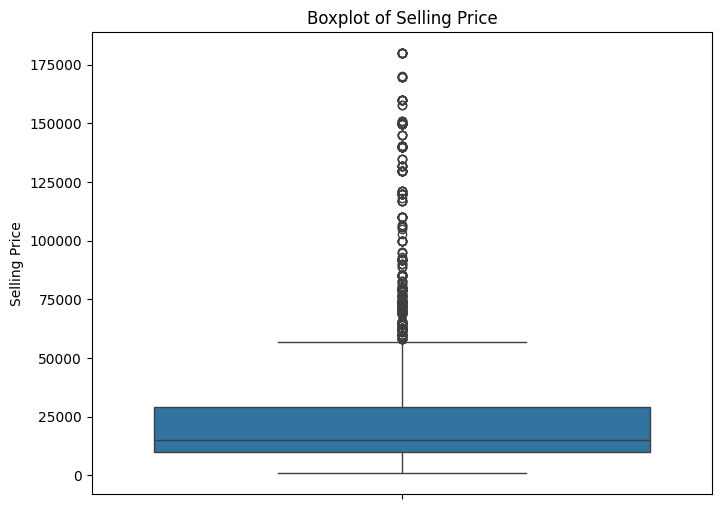

In [48]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Selling Price'])
plt.title('Boxplot of Selling Price')
plt.ylabel('Selling Price')
plt.show()

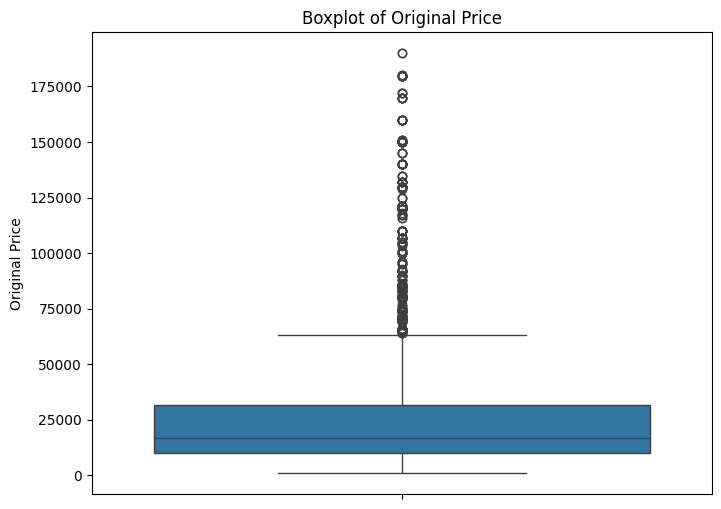

In [49]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Original Price'])
plt.title('Boxplot of Original Price')
plt.ylabel('Original Price')
plt.show()

#**Eksplorasi Data EDA**

##**Comparision (perbandingan)**

Aktivitas: Membandingkan total nominal penjualan (Sales) di setiap wilayah pasar (Market).

Tujuan: Mengidentifikasi wilayah mana yang memberikan kontribusi pendapatan terbesar dan membandingkan performa antar wilayah secara langsung.

Visualisasi: Bar Chart (Grafik Batang).

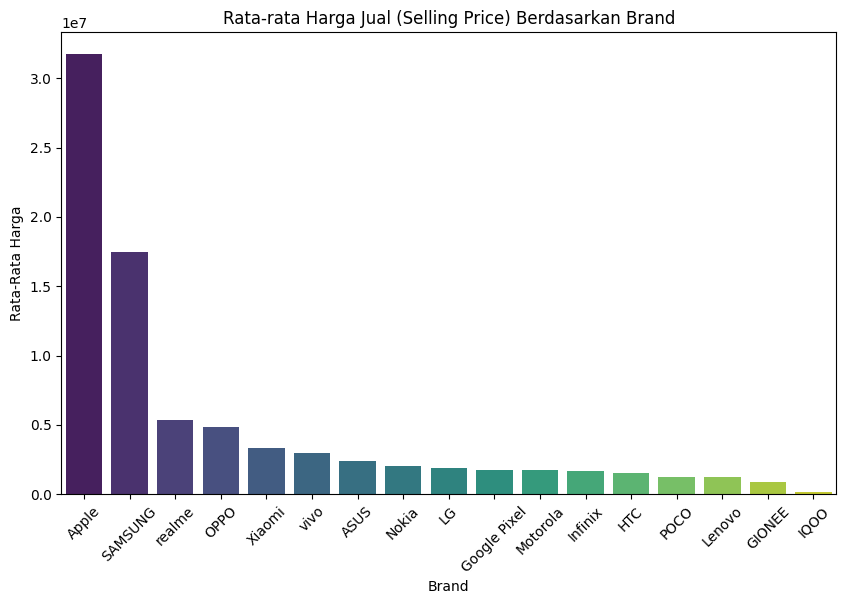

In [50]:
avg_price_brand = df.groupby('Brands')['Selling Price'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))

sns.barplot(x=avg_price_brand.index, y=avg_price_brand.values, palette='viridis', hue=avg_price_brand.index, legend=False)
plt.title('Rata-rata Harga Jual (Selling Price) Berdasarkan Brand')
plt.xlabel('Brand')
plt.ylabel('Rata-Rata Harga')
plt.xticks(rotation=45)
plt.show()

##**Composition(Komposisi)**

**Aktivitas:**

Melihat proporsi atau persentase total nilai penjualan (Selling Price) berdasarkan merek ponsel (Brands).

**Tujuan:**

Mengetahui merek ponsel mana yang paling mendominasi perputaran uang atau pendapatan total di pasar secara keseluruhan. Dengan analisis ini, kita bisa mengidentifikasi pemimpin pasar (market leader) bukan berdasarkan jumlah unitnya, melainkan berdasarkan nilai ekonomi yang dihasilkan.

**Visualisasi:**

Pie Chart (Grafik Lingkaran).

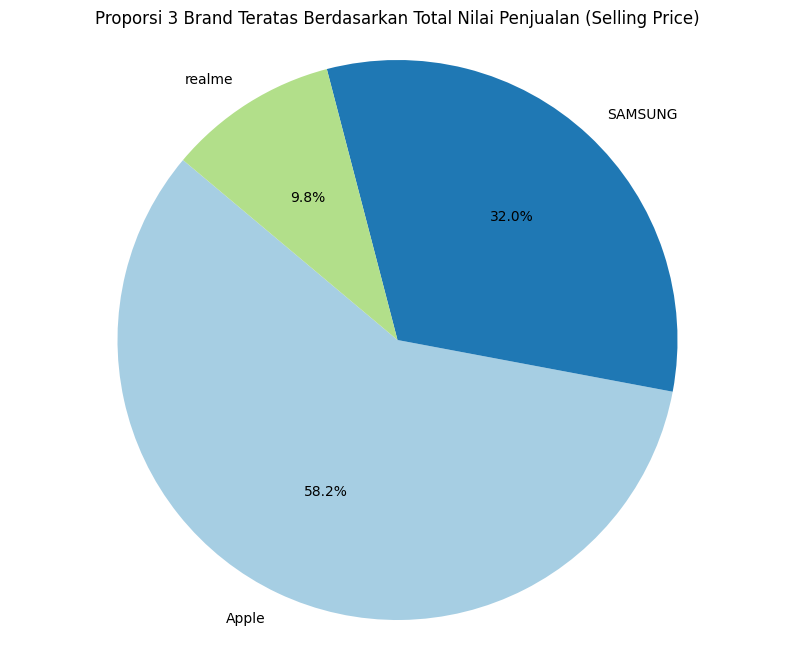

In [51]:
brand_composition = df.groupby('Brands')['Selling Price'].sum().sort_values(ascending=False)
brand_top3 = brand_composition.head(3)

plt.figure(figsize=(10, 8))
brand_top3.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proporsi 3 Brand Teratas Berdasarkan Total Nilai Penjualan (Selling Price)')
plt.ylabel('')
plt.axis('equal')
plt.show()

##**Distribution(Distribusi)**

Aktivitas: Menganalisis penyebaran nilai harga pada kolom Selling Price (Harga Jual).

Tujuan: Melihat apakah mayoritas ponsel yang dijual berada pada rentang harga yang murah (entry-level) atau mahal (flagship), serta mendeteksi adanya kecondongan (skewness) untuk memahami segmen pasar yang paling mendominasi dalam dataset.

Visualisasi: Histogram.

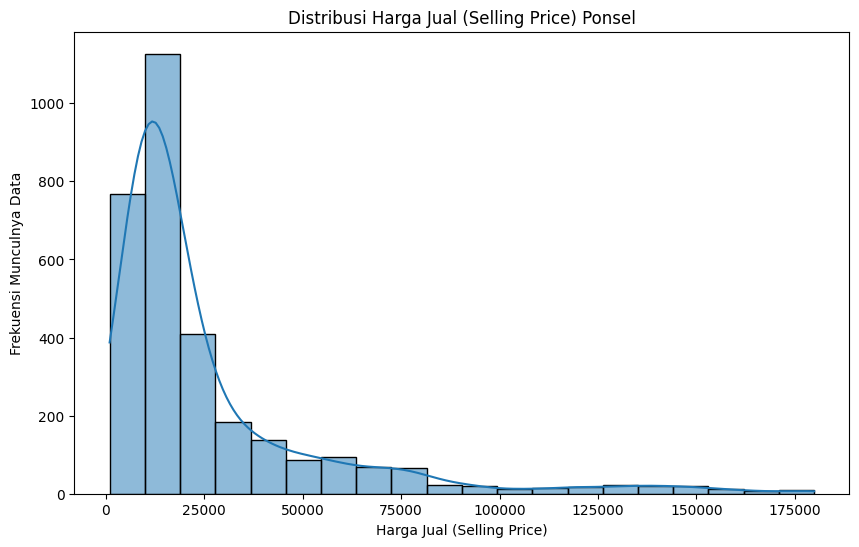

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Selling Price'], bins=20, kde=True)
plt.title('Distribusi Harga Jual (Selling Price) Ponsel')
plt.xlabel('Harga Jual (Selling Price)')
plt.ylabel('Frekuensi Munculnya Data')
plt.show()

##**Relationship(Hubungan)**

Aktivitas: Menganalisis korelasi antara nilai pembelian (Purchase Amount (USD)) dengan rating ulasan (Review Rating).

Tujuan: Mengetahui apakah pembelian dengan nominal yang lebih tinggi cenderung mendapatkan rating yang lebih baik, serta melihat kekuatan hubungan antara nilai transaksi dan kepuasan pelanggan.

Visualisasi: Heatmap

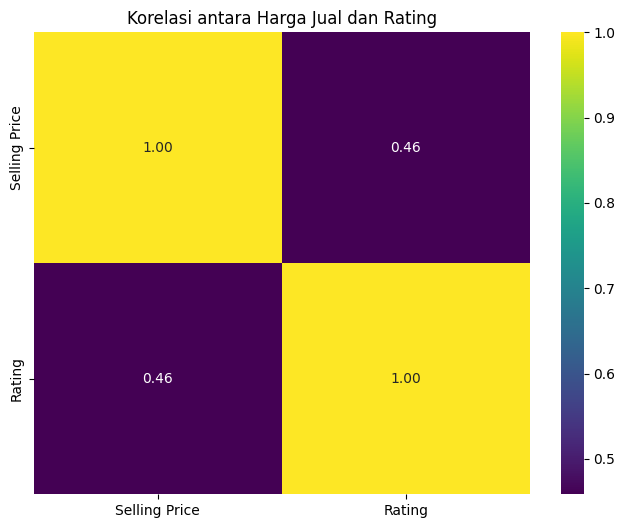

In [53]:
plt.figure(figsize=(8, 6))
sns.heatmap(data=df[['Selling Price', 'Rating']].corr(),
annot=True,
cmap='viridis',
fmt='.2f')
plt.title('Korelasi antara Harga Jual dan Rating')
plt.show()

#**Menyimpan Dataset**

In [54]:
df.to_csv('Check Point 2 Farrel Fazzadinata Sumarna', index=False)